# EDA

作者：艾宏峰<br>
创建时间：2020年2月13日

EDA内容如下：<br>
1. 总数据量数和各类别数据量总览<br>
2. 图像库图像数量频次图<br>
3. 图像库图像标注概况<br>
4. 图像库文本数据概况<br>
5. 视频库视频标注概况<br>
6. 视频库文本数据概况<br>
7. 其它

In [1]:
import json
import glob
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
# 文件路径
dataset_paths = glob.glob('data/*')

# 图像库中图片/标注/文本路径
img_folder_paths = [] # 所有data/train_dataset_part<n>/images中所有文件夹
img_ann_folder_paths = [] # 所有data/train_dataset_part<n>/image_annotatonl中所有文件夹
img_txt_paths = [] # 所有data/train_dataset_part<n>/image_text中txt文件

# 视频库中视频/标注/文本路径
video_mp4_paths = [] # 所有data/train_dataset_part<n>/video中所有视频
video_ann_paths = [] # 所有data/train_dataset_part<n>/video_annotation中所有json文件
video_txt_paths = [] # 所有data/train_dataset_part<n>/video_text中txt文件

for dataset_path in dataset_paths:
#     if dataset_path.split('/')[-1].startswith('train'):
        img_folder_paths.extend(glob.glob(dataset_path + '/image/*'))
        img_ann_folder_paths.extend(glob.glob(dataset_path + '/image_annotation/*'))
        img_txt_paths.extend(glob.glob(dataset_path + '/image_text/*.txt'))
        
        video_mp4_paths.extend(glob.glob(dataset_path + '/video/*.mp4'))
        video_ann_paths.extend(glob.glob(dataset_path + '/video_annotation/*.json'))
        video_txt_paths.extend(glob.glob(dataset_path + '/video_text/*.txt'))

### 1. 总数据量数和各类别数据量总览
针对image和video文件夹下的文件个数进行统计。同时对于类别数量，针对image_annotaion和vedio_annotation文件夹内的json标注文件进行统计。

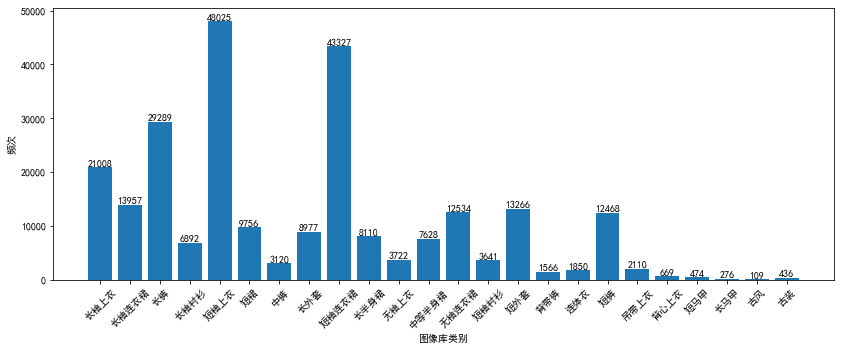

In [3]:
label_num_dict = {} # 类别数量 频次字典

for img_ann_folder_path in img_ann_folder_paths:
    json_paths = glob.glob(img_ann_folder_path + '/*.json')
    for json_path in json_paths:
        with open(json_path, 'r') as f:
            img_ann = json.load(f)
        
        for ann in img_ann['annotations']:
            label = ann['label']
            
            if label not in list(label_num_dict.keys()):
                label_num_dict[label] = 1
            else:
                label_num_dict[label] += 1  
            
fig = plt.figure(figsize=(14,5))

x1 = list(label_num_dict.keys())
y1 = list(label_num_dict.values())
plt.bar(range(len(x1)), y1)
for a, b in zip(list(range(len(x1))), y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(list(range(len(x1))), x1, rotation=45)
plt.xlabel("图像库类别")
plt.ylabel("频次")
plt.show()

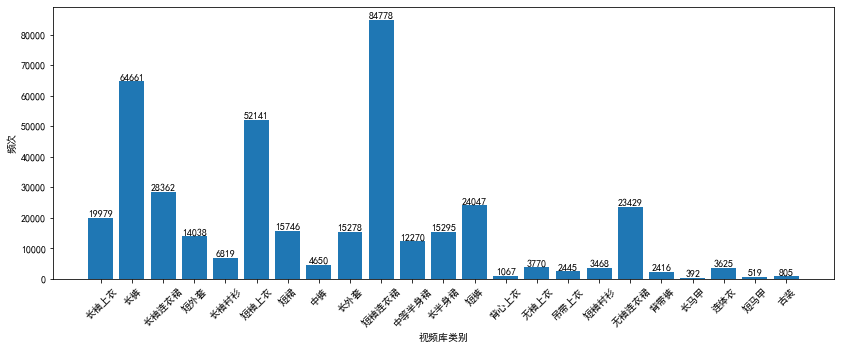

In [4]:
label_num_dict = {} # 类别数量 频次字典

for json_path in video_ann_paths:
    with open(json_path, 'r') as f:
        v_ann = json.load(f)

    for frame in v_ann['frames']:
        for frame_ann in frame['annotations']:
            label = frame_ann['label']

        if label not in list(label_num_dict.keys()):
            label_num_dict[label] = 1
        else:
            label_num_dict[label] += 1  
            
fig = plt.figure(figsize=(14,5))

x1 = list(label_num_dict.keys())
y1 = list(label_num_dict.values())
plt.bar(range(len(x1)), y1)
for a, b in zip(list(range(len(x1))), y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(list(range(len(x1))), x1, rotation=45)
plt.xlabel("视频库类别")
plt.ylabel("频次")
plt.show()

In [5]:
print('在image图像库里的商品总数：%d' % len(img_folder_paths))
print('在vide视频库里的商品总数：%d' % len(video_mp4_paths))

在image图像库里的商品总数：40000
在vide视频库里的商品总数：40000


### 2. 图像库图像数量频次图
针对image文件夹内的jpg图片进行分析。

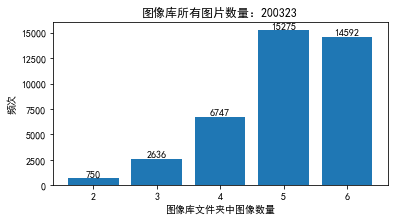

In [6]:
all_img_num = 0 # 所有图像数
img_num_dict = {} # 图像数量 频次字典

for img_folder_path in img_folder_paths:
    img_num = len(glob.glob(img_folder_path + '/*.jpg'))
    if img_num not in list(img_num_dict.keys()):
        img_num_dict[img_num] = 1
    else:
        img_num_dict[img_num] += 1
        
    all_img_num = all_img_num + img_num

fig = plt.figure(figsize=(6,3))
x = list(img_num_dict.keys())
y = list(img_num_dict.values())
plt.bar(x, y)
for a, b in zip(x, y):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x)
plt.xlabel("图像库文件夹中图像数量")
plt.ylabel("频次")
plt.title('图像库所有图片数量：%d' % all_img_num)
plt.show()

大部分商品图像库文件夹中含有5/6张图片，而且，至少为2张图片。

### 3. 图像库图像标注概况
针对image_annotaion文件夹内的json标注文件进行分析。（图像库图片数 = 图像库图片标注数）

dispaly错标数据: data/train_dataset_part3/image_annotation/001541/0.json


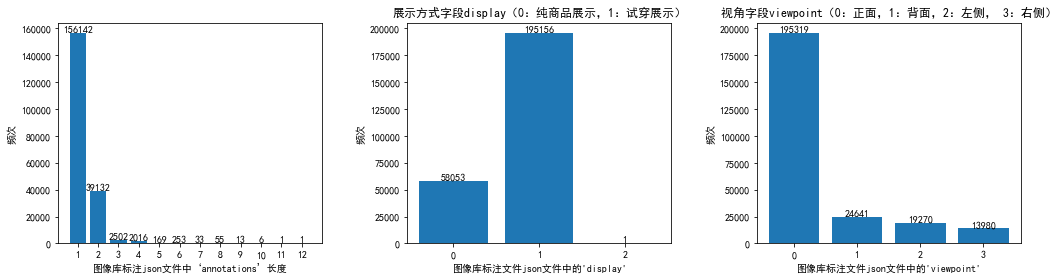

In [7]:
display_dict = {} # 商品库图展示方式 频次字典
viewpoint_dict = {} # 商品库图片拍摄视角 频次字典
ann_dict = {} # 一张图的标注数 频次字典

for img_ann_folder_path in img_ann_folder_paths:
    json_paths = glob.glob(img_ann_folder_path + '/*.json')
    for json_path in json_paths:
        with open(json_path, 'r') as f:
            img_ann = json.load(f)
        
        for ann in img_ann['annotations']:
            display = ann['display']
            viewpoint = ann['viewpoint']
            
            # 更新display频次字典
            if display not in list(display_dict.keys()):
                display_dict[display] = 1
            else:
                display_dict[display] += 1
            
            # 更新viewpoint频次字典
            if viewpoint not in list(viewpoint_dict.keys()):
                viewpoint_dict[viewpoint] = 1
            else:
                viewpoint_dict[viewpoint] += 1  
                
            # 打印display异常信息
            if int(display) > 1:
                print("dispaly错标数据: " + json_path)
            # 打印viewpoint异常信息
            if int(viewpoint) > 3:
                print("viewpoint错标数据: " + json_path)
                
        ann_num = len(img_ann['annotations'])

        if ann_num not in list(ann_dict.keys()):
            ann_dict[ann_num] = 1
        else:
            ann_dict[ann_num] += 1

fig = plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
x1 = list(ann_dict.keys())
y1 = list(ann_dict.values())
plt.bar(x1, y1)
for a, b in zip(x1, y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x1)
plt.xlabel("图像库标注json文件中‘annotations’长度")
plt.ylabel("频次")

plt.subplot(1,3,2)
x2 = list(display_dict.keys())
y2 = list(display_dict.values())
plt.bar(x2, y2)
for a, b in zip(x2, y2):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x2)
plt.xlabel("图像库标注文件json文件中的'display'")
plt.ylabel("频次")
plt.title("展示方式字段display（0：纯商品展示，1：试穿展示）")

plt.subplot(1,3,3)
x3 = list(viewpoint_dict.keys())
y3 = list(viewpoint_dict.values())
plt.bar(x3, y3)
for a, b in zip(x3, y3):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x3)
plt.xlabel("图像库标注文件json文件中的'viewpoint'")
plt.ylabel("频次")
plt.title("视角字段viewpoint（0：正面，1：背面，2：左侧， 3：右侧）")

plt.tight_layout()
plt.show()

（1）商品库中单张图像所对应的标注文件里至少都有1个标注。<br>
（2）只有1张出现'display=2'(即侧面视角)的图片，为错标注数据。大部分都是试穿展示，然后再是纯商品展示。<br>
（3）大部分图片为正面，其次是背面，最后是侧面。

### 4. 图像库文本数据概况
针对image_text文件夹内的txt文本文件进行分析。（图像库图片数 = 图像库文本标注数）

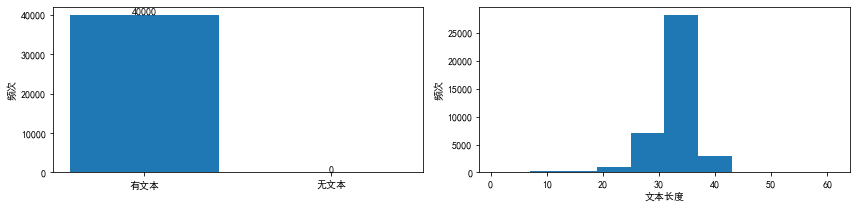

In [8]:
txt_dict = {'1':0, '0':0} # 文本存在与否 频次字典
txt_len_list = [] # 文本长度 列表

for txt_path in img_txt_paths:
    with open(txt_path, 'r') as f:
        txt = f.read()
    txt = txt.strip() # 去空格
    
    if len(txt) != 0:
        txt_dict['1'] += 1
        txt_len_list.append(len(txt))
    else:
        txt_dict['0'] += 1

fig = plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
x1 = list(txt_dict.keys())
y1 = list(txt_dict.values())
plt.bar(x1, y1)
for a, b in zip(x1, y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks([0,1], ['有文本','无文本'])
plt.ylabel('频次')

plt.subplot(1,2,2)
plt.hist(txt_len_list, align='mid')
plt.xlabel("文本长度")
plt.ylabel('频次')

plt.tight_layout()
plt.show()

（1）所有商品库图片都有文本描述。<br>
（2）大部分文本描述长度在30个字左右。

### 5. 视频库视频标注概况
针对video_annotaion文件夹内的json标注文件进行分析。（视频库视频数 = 视频库视频标注数）

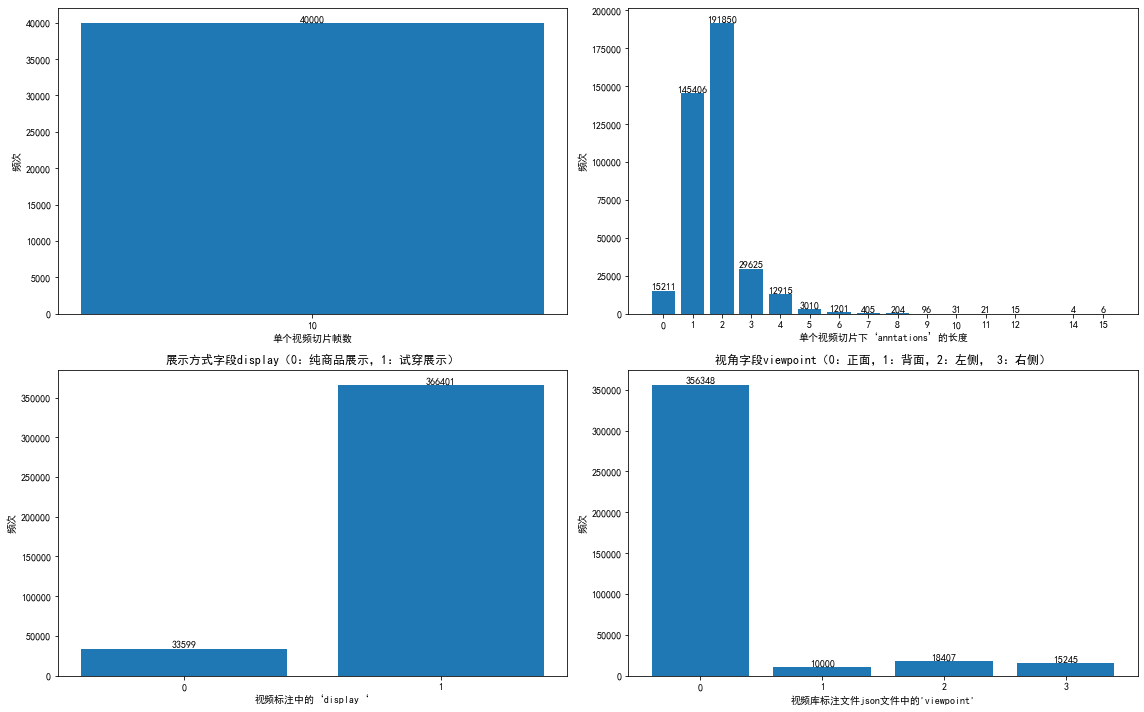

In [9]:
# video_ann_paths = glob.glob(video_ann_path + '*.json')

video_frame_num_dict = {} # 单个视频帧数 频次字典
video_ann_num_dict = {} # 单个视频帧下标注数量 频次字典
video_display_dict = {} # 视频标注中‘display’ 频次字典
video_viewpoint_dict = {} # 视频标注中‘viewpoint’ 频次字典

for v_ann_path in video_ann_paths:
    with open(v_ann_path, 'r') as f:
        v_ann = json.load(f)
    
    frame_num = len(v_ann['frames'])
    if frame_num not in list(video_frame_num_dict.keys()):
        video_frame_num_dict[frame_num] = 1
    else:
        video_frame_num_dict[frame_num] += 1
        
    for frame in v_ann['frames']:
        video_ann_num = len(frame["annotations"])
        
        if video_ann_num not in list(video_ann_num_dict.keys()):
            video_ann_num_dict[video_ann_num] = 1
        else:
            video_ann_num_dict[video_ann_num] += 1
        
        for frame_ann in frame['annotations']:
            frame_display = frame_ann['display']
            frame_viewpoint = frame_ann['viewpoint']
        
        # 更新display频次字典
        if frame_display not in list(video_display_dict.keys()):
            video_display_dict[frame_display] = 1
        else:
            video_display_dict[frame_display] += 1

        # 更新viewpoint频次字典
        if frame_viewpoint not in list(video_viewpoint_dict.keys()):
            video_viewpoint_dict[frame_viewpoint] = 1
        else:
            video_viewpoint_dict[frame_viewpoint] += 1  

fig = plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
x1 = list(video_frame_num_dict.keys())
y1 = list(video_frame_num_dict.values())
plt.bar(x1, y1)
for a, b in zip(x1, y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x1)
plt.xlabel("单个视频切片帧数")
plt.ylabel("频次")

plt.subplot(2,2,2)
x2 = list(video_ann_num_dict.keys())
y2 = list(video_ann_num_dict.values())
plt.bar(x2, y2)
for a, b in zip(x2, y2):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x2)
plt.xlabel("单个视频切片下‘anntations’的长度")
plt.ylabel("频次")

plt.subplot(2,2,3)
x3 = list(video_display_dict.keys())
y3 = list(video_display_dict.values())
plt.bar(x3, y3)
for a, b in zip(x3, y3):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x3)
plt.xlabel("视频标注中的‘display‘")
plt.ylabel("频次")
plt.title("展示方式字段display（0：纯商品展示，1：试穿展示）")

plt.subplot(2,2,4)
x4 = list(video_viewpoint_dict.keys())
y4 = list(video_viewpoint_dict.values())
plt.bar(x4, y4)
for a, b in zip(x4, y4):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks(x4)
plt.xlabel("视频库标注文件json文件中的'viewpoint'")
plt.ylabel("频次")
plt.title("视角字段viewpoint（0：正面，1：背面，2：左侧， 3：右侧）")

plt.tight_layout()
plt.show()

（1）所有mp4视频下，都保证有10个视频切片帧数（即单个视频都有10个frame）。<br>
（2）大部分单个视频切片下有1/2个标注（即1/2个bboxes），但也有’没有标注‘和‘很多标注’的情况。<br>
（3）大部分视频切片下的图示属于试穿展示。<br>
（4）大部分视频切片是正面。

### 6. 视频库文本数据概况
针对video_text文件夹内的txt文本文件进行分析。（视频库视频数 = 视频库文本标注数）

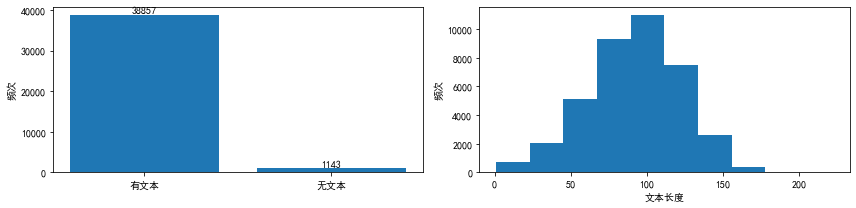

In [10]:
v_txt_dict = {'1':0, '0':0} # 文本存在与否 频次字典
v_txt_len_list = [] # 文本长度 列表

for video_txt_path in video_txt_paths:
    with open(video_txt_path, 'r') as f:
        txt = f.read()
    txt = txt.strip() # 去空格
    
    if len(txt) != 0:
        v_txt_dict['1'] += 1
        v_txt_len_list.append(len(txt))
    else:
        v_txt_dict['0'] += 1

fig = plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
x1 = list(v_txt_dict.keys())
y1 = list(v_txt_dict.values())
plt.bar(x1, y1)
for a, b in zip(x1, y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.xticks([0,1], ['有文本','无文本'])
plt.ylabel('频次')

plt.subplot(1,2,2)
plt.hist(v_txt_len_list, align='mid')
plt.xlabel("文本长度")
plt.ylabel('频次')

plt.tight_layout()
plt.show()

（1）单个视频只有一个视频标注，即单个视频中的10个视频切片都共享一个文本。<br>
（2）视频都不一定有文本描述。<br>
（3）大部分文本描述长度在100个字左右，比图像库的文本描述长。

### 7. 其它
下列问题均为团队内对数据提出的一些疑问。
#### 问题1：是否视频库中出现的衣服，商品图像库都有？同样地，是否图像库中的衣服都能匹配到视频库中的衣服？
由于官方说明：“商品图和视频帧中标注了大于0的相同instance_id的检测框为同一件商品，具有对应关系，instance_id为0表示不具有匹配关系”。因此，可以观察video_annotation中是否出现“frames”-"annotations"-"instance_id"有等于0的情况，回答该问题。若有不匹配，则说明视频库中的衣服无法匹配到商品图像库中。

In [11]:
v_instance_list = [] # 记录所有视频标注里的“instance_id”
img_instance_list = [] # 记录所有图片标注里的“instance_id”

for v_ann_path in video_ann_paths:
    with open(v_ann_path, 'r') as f:
        v_ann = json.load(f)
    
    for frame in v_ann['frames']:
        for frame_ann in frame['annotations']:
            v_instance_list.append(frame_ann['instance_id'])
            
for img_ann_folder_path in img_ann_folder_paths:
    json_paths = glob.glob(img_ann_folder_path + '/*.json')
    for json_path in json_paths:
        with open(json_path, 'r') as f:
            img_ann = json.load(f)

        for ann in img_ann['annotations']:
            img_instance_list.append(ann['instance_id'])
            
v2i_unmatch_num = 0
i2v_unmatch_num = 0

for i in list(set(v_instance_list)):
    if i not in list(set(img_instance_list)):
        v2i_unmatch_num += 1
        
for i in list(set(img_instance_list)):
    if i not in list(set(v_instance_list)):
        i2v_unmatch_num += 1
        
if v2i_unmatch_num != 0:
    print("视频库中出现的衣服不一定在商品图像库中都有。")
else:
    print("视频库中出现的衣服都可以在商品图像库中匹配到")
    
if i2v_unmatch_num != 0:
    print("图片库中出现的衣服不一定在视频库中都有。")
else:
    print("图片库中出现的衣服都可以在商品视频库中匹配到")         

视频库中出现的衣服不一定在商品图像库中都有。
图片库中出现的衣服不一定在视频库中都有。


#### 问题2：视频库和图像库中都分别出现哪些商品类别？
官方说明是22个商品大类。针对video_annotation和image_annotation中"annotations"-"labels"获取集合便可以得到。

In [12]:
# video_ann_paths = glob.glob(video_ann_path + '*.json')
# img_ann_folder_paths = glob.glob(img_ann_path + '*')

v_label_list = [] # 记录所有视频标注里的“label”
img_label_list = [] # 记录所有图片标注里的“label”

for v_ann_path in video_ann_paths:
    with open(v_ann_path, 'r') as f:
        v_ann = json.load(f)
    
    for frame in v_ann['frames']:
        for frame_ann in frame['annotations']:
            v_label_list.append(frame_ann['label'])
            
for img_ann_folder_path in img_ann_folder_paths:
    json_paths = glob.glob(img_ann_folder_path + '/*.json')
    for json_path in json_paths:
        with open(json_path, 'r') as f:
            img_ann = json.load(f)

        for ann in img_ann['annotations']:
            img_label_list.append(ann['label'])
            
print("出现的商品类别：")
print('-'*50)
print("视频库(%d个)："%len(set(v_label_list)), list(set(v_label_list)))
print('-'*50)
print("图像库(%d个)："%len(set(img_label_list)),list(set(img_label_list)))

出现的商品类别：
--------------------------------------------------
视频库(23个)： ['短外套', '短裤', '短袖上衣', '长半身裙', '背带裤', '长袖上衣', '长袖连衣裙', '短马甲', '短裙', '背心上衣', '短袖连衣裙', '长袖衬衫', '中等半身裙', '无袖上衣', '长外套', '无袖连衣裙', '连体衣', '长马甲', '长裤', '吊带上衣', '中裤', '古装', '短袖衬衫']
--------------------------------------------------
图像库(24个)： ['短外套', '古风', '短裤', '短袖上衣', '长半身裙', '背带裤', '长袖上衣', '长袖连衣裙', '短马甲', '短裙', '背心上衣', '短袖连衣裙', '长袖衬衫', '中等半身裙', '无袖上衣', '长外套', '无袖连衣裙', '连体衣', '长马甲', '长裤', '吊带上衣', '中裤', '古装', '短袖衬衫']


#### 问题3：若单个商品图像文件夹中出现多个商品标注，它们都能匹配吗？
在’EDA‘-’2. 图像库图像标注概况‘下，我们已经发现单个图片的标注数为0-2之间。但是还想知道’如果单个图像有多个标注，是否都可以与视频匹配上？‘还是说每张图只有一个标注是能匹配的，多余的标注都是’instance_id‘=0，不能匹配上的。

In [13]:
# img_ann_folder_paths = glob.glob(img_ann_path + '*')

# print("单个图像文件夹下出现’多个instance_id‘的情况：")
# for img_ann_folder_path in img_ann_folder_paths:
#     instance_id_list = [] # 记录单个图像文件夹下所有的'instance_id'
    
#     json_paths = glob.glob(img_ann_folder_path + '/*.json')
#     for json_path in json_paths:
#         with open(json_path, 'r') as f:
#             img_ann = json.load(f)
    
    
#         ann_num = len(img_ann['annotations'])    
#         for ann in img_ann['annotations']:
#             instance_id_list.append(ann['instance_id'])
    
#     if len(set(instance_id_list)) > 1:
#        print(set(instance_id_list))

# print('-'*50)
# print("单个图像文件夹下出现’一个instance_id‘的情况：")
# for img_ann_folder_path in img_ann_folder_paths:
#     instance_id_list = [] # 记录单个图像文件夹下所有的'instance_id'
    
#     json_paths = glob.glob(img_ann_folder_path + '/*.json')
#     for json_path in json_paths:
#         with open(json_path, 'r') as f:
#             img_ann = json.load(f)
    
    
#         ann_num = len(img_ann['annotations'])    
#         for ann in img_ann['annotations']:
#             instance_id_list.append(ann['instance_id'])
    
#     if len(set(instance_id_list)) <= 1:
#         print(set(instance_id_list))

（1）如果查看000013图像文件夹下的图片，便可知道‘20001301’和‘20001302’其实是个衣服套装。由上面可得‘instance_id’的命名规则：<br>
2 + < item_id > + <选择><br>
若某商品有两种选择，一条裤子，一件衣服，则对于可以标号上述‘<选择>’为‘01’和‘02’。<br>
（2）商品图像文件夹正常都是展示统一件商品，如果存在两个标注，要么是不相干的商品（无法被匹配的，‘instance_id’=0），要么是不同款式选择的情况。

#### 问题4：若单个商品视频切片中出现多个商品标注，它们都能匹配吗？
在’EDA‘-’4. 视频库视频标注概况‘下，我们已经发现有’单个视频切片的标注有3-6个‘的情况。但是还想知道’如果单个视频切片中有多个标注，是否都可以与图像库匹配上？‘还是说单个视频切片只有一个标注是能匹配的，多余的标注都是’instance_id‘=0，不能匹配上的。

In [14]:
# video_ann_paths = glob.glob(video_ann_path + '*.json')

for v_ann_path in video_ann_paths:
    with open(v_ann_path, 'r') as f:
        v_ann = json.load(f)
    
    instance_id_list_all = [] # 记录单个视频下所有json离得的'instance_id'
    for frame in v_ann['frames']:
        instance_id_list = [] # 记录单个视频切片下所有的'instance_id'
        for ann in frame['annotations']:
            instance_id_list.append(ann['instance_id'])
            instance_id_list_all.append(ann['instance_id'])

# #如果想查看frame-level和video-level下商品标注的'instance_id'的情况，可以分别解除下面的注释并运行

#         # 打印出单个视频切片中存在多个商品标注的'instance_id'
#         if len(set(instance_id_list))>1:
#             print(set(instance_id_list))    
    
#     # 打印出单个视频中存在多个商品标注的'instance_id'
#     if len(set(instance_id_list_all))>1:
#         print(set(instance_id_list_all))   

（1）在单个视频（即video-level）下，只存在展示一种商品，但中间可能会有不相干的商品，不过不相干商品都无法匹配到商品库，因为其instance_id=0。而有时也会出现同一个视频中出现一种商品但有不同款式选择的情况，例如一件套装商品含有（裤子和衣服）。<br>
（2）在单个视频切片下（即frame_level）下，跟上面是一样的情况。

例子：在Live_demo_20200117/video_annotation/000001.json下，如果你看‘frame_index'=0的标注，你会看到有两个annotation，即第1秒视频开头的直播切片存在两个标注，一个是'长裤'，一个是'长款外套'。但这只有'长款外套'是可以匹配到商品图像库的，’长裤‘无法匹配到，因为其'instance_id'=0。

#### 问题5：视频是否都为一个人？如果有两个人，两个人是否都为一套衣服？或者不相干人的衣服会不会有标注显示？

在单个视频（即video-level）下，只存在展示一种商品，但中间可能会有不相干的商品，不过不相干商品都无法匹配到商品库，因为其instance_id=0。而有时也会出现同一个视频中出现套装搭配（例如裤子和衣服）。